In [3]:
df = pd.read_csv("hotel_bookings.csv")


In [5]:
df['is_canceled'].unique()

array([ 0.,  1., nan])

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_43293/1023773265.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelled_by_lead_time = df.groupby('lead_time_bin')['is_canceled'].mean().reset_index()


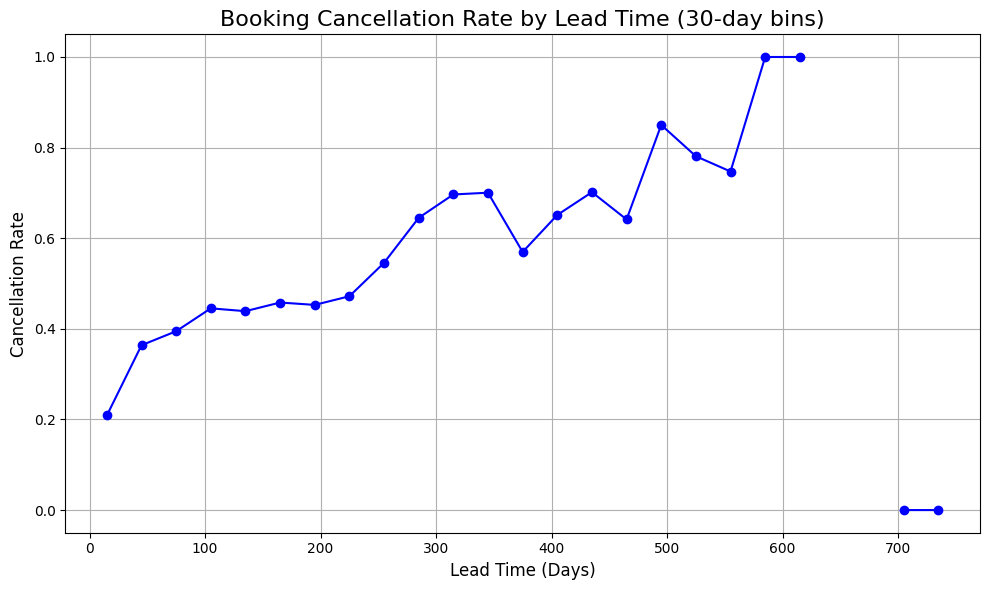

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# This loads the CSV file
#df = pd.read_csv("hotel_bookings(1).csv")
df = pd.read_csv("hotel_bookings.csv")

# This cleans the data for 'is_canceled'
df['is_canceled'] = pd.to_numeric(df['is_canceled'], errors='coerce')
df['is_canceled'] = df['is_canceled'].fillna(0).astype(int)

# This section that prevents the data from being too squiggly 
# This creates 30-day bins for lead time 
bin_size = 30
max_lead_time = df['lead_time'].max()
bins = list(range(0, int(max_lead_time) + bin_size, bin_size))

df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins)

# This calculates  the cancellation rate by binned lead time
cancelled_by_lead_time = df.groupby('lead_time_bin')['is_canceled'].mean().reset_index()

# This creates the plot
plt.figure(figsize=(10, 6))

# Plot using the mid-point of each bin
plt.plot(
    [x.left + (bin_size/2) for x in cancelled_by_lead_time['lead_time_bin']],  # Use bin center
    cancelled_by_lead_time['is_canceled'], color='blue', marker='o', linestyle='-')


#This is the code to plot the graph
plt.title("Booking Cancellation Rate by Lead Time (30-day bins)", fontsize=16)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Cancellation Rate", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()



In [2]:
df['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119389    0
119390    0
119391    0
119392    0
119393    0
Name: is_canceled, Length: 119394, dtype: int64

## **Mini-Report: Analyzing Hotel Booking Cancellations**

### **1. Business Question**
What factors contribute to hotel booking cancellations, and how can hotels try and limit cancellations?

### **2. Relevance**
Understanding booking cancellations is crucial for hotels in order to maximize occupancy rates and revenue. High cancellation rates can lead to revenue loss, inefficient resource allocation, and potential overbooking issues. Identifying the factors that influence the hotels cancellation rates are very important to help the hotel operate to the best of its ability

### **3. Data Justification**
To analyze cancellations, we selected relevant attributes from the dataset, including:
- **Lead time** (longer wait times potentially correlates with cancellations).
- **Deposit type** (customers who pay deposits may be less likely to cancel).
- **Market segment & distribution channel** (booking platforms might have an impact on cancellation behavior).
- **Previous cancellations** (guests with a history of cancellations may have a higher likelihood of canceling again).

These variables are the key factors when trying to predict what influences cancellation rates

### **4. Findings and Insights**
Our analysis reveals that **longer lead times increase the number of cancellations**. Also, bookings made through **online travel agents and without deposits** usualy have higher cancellation rates. Guests with **previous cancellations** also have a higher chance of canceling again. The graph highlights these trends and shows that hotels can reduce cancellations by doing these things; **requiring deposits, prioritizing direct bookings, and making sure hotels deal with booking far in advance so they dont get as many cancellations**.

Overall mark: 53

#### Business Question
A relevent business question that can be answered with the given data is clearly identified. The reason to answer the proposed question is also explained. Evidences are presented to address the question. However, only the evidence from lead time is visualized appropriately. Findings from data and implications for the hotel industry are provided in the analysis. Although those findings and implications are sensible, most of them are not data-supported.

<u>Good</u>

#### Data
To answer the business question, relevant variables including lead time, deposite type, market segment & distribution channel and previous cancellations, are identified with clear explanations. However, though the variable selection is comprehensive, there is no direct justification of how these variables are critical to answer the question. Some basic variable type transformation and NaN-handling are applied. From the code for the data analysis, deposit type, market segment & distribution channel and previous cancellations are not actually used. This makes the findings and insights from these variables not data-supported.

<u>Pass</u>

#### Visualization
A plot with dotted line is presented for visualization of the findings. Essential elements including the title, axis labels and ticks are displayed. However, the outlier in the plot (lead time > 700 days) may require extra explanation and annotation. Though four different variables are said to be considered, the visualization only focuses on the lead time, which is insufficient for answering the question.

<u>Pass</u>

#### Code
The code is clear with minial errors. There is a minor issue in importing the data file (The file name "hotel_bookings(1).csv" only works on your machine. You should use the file name that is accessible to others who run you code). Necessary comments are provided along the code. It is suggested to put the code with different functionality in different cells when using Jupyter Notebook, which can improve the overall readability.

<u>Pass</u>